# 事前準備：共通コードの実行
* このノートブックに接続したら，まずは以下の2つの共通コード（コードAとコードB）を実行する
* これらの共通コードを実行しないと，それ以降のコードが実行できないので注意する
* また，コードAとコードBは，ノートブックに接続するたび毎回実行すること（ノートブックに接続中は，何度も実行する必要はない）
* 共通コードの詳細についての説明は割愛する（簡単な説明は第2回の「[サンプルノートブック02](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook02.ipynb)」を参照）

In [ ]:
# コードA：日本語化ライブラリ導入
! pip install japanize-matplotlib | tail -n 1

In [2]:
# コードB：共通事前処理

#B1:余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

#必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib #matplotlib日本語化対応
import seaborn as sns

#B2:データフレーム表示用関数
from IPython.display import display

#B3:表示オプション調整
np.set_printoptions(suppress = True, precision = 3) #numpyの浮動小数点の表示精度
pd.options.display.float_format = '{:.3f}'.format #pandasでの浮動小数点の表示精度
pd.set_option('display.max_columns', None) #データフレームですべての列データを表示

#B4:グラフのデフォルトフォント指定
plt.rcParams['font.size'] = 14

#乱数の種
random_seed = 123

## コードAの補足
このコードは，Pythonのパッケージを管理するためのシステムである`pip`を使用して，japanize-matplotlibというライブラリをインストールし，その出力の最後の1行だけを表示する．
  
*  `! pip install japanize-matplotlib`: `pip`の`install`コマンドを使って，japanize-matplotlibパッケージをインストールする．japanize-matplotlibは，Matplotlibライブラリで日本語の文字表示を可能にするためのパッケージである．
*  `| tail -n 1`: Unix/Linuxの`tail`コマンドを使って，インストールプロセスの出力のうち最後の1行のみを表示する．パイプ`|`によって，`install`コマンドの出力が`tail`コマンドの入力となる．`-n 1`オプションは，末尾から1行だけを取得することを指定している．  
  
このコードは，Jupyter NotebookやGoogle ColaboratoryのようなPythonのインタラクティブな実行環境で使用されることが多い．`!`をコマンドの前に付けることで，Python環境内からシステムのコマンドを実行することができる．この場合，japanize-matplotlibのインストールが成功したかどうか，または関連する最後のメッセージを確認するために使われています．

## コードBの補足
### B1:余分なワーニングを非表示にする
この部分のコードで，コード実行後に表示される警告メッセージを非表示にしている．具体的には，Pythonの標準ライブラリである`warnings`モジュールの`filterwarnings`関数を使用する．`warnings`モジュールは、開発者（プログラマ）に警告（非致命的なエラーなど）を発するためのモジュールである．  
  
*  `import warnings`: `warnings`モジュールをインポートする．
*  `warnings.filterwarnings('ignore')`: `filterwarnings`関数を使って，発生する警告を非表示にする（無視する）．

この処理は，特定の警告が表示されることがわかっており，それによる出力が実行結果の可読性を損なう場合などに使われる（本講義でもこの目的で使っている）．ただし，警告メッセージはコードに潜在的な問題があることを知らせる重要な手がかりを提供するので，慎重に使用する必要がある．

### B2:データフレーム表示用関数
この部分のコードで，`IPython.display`モジュールから`display`関数をインポートしている．`IPython.display`モジュールは，IPython環境（Jupyter NotebookやGoogle Colaboratoryを含む）内でリッチなウェブベースのコンテンツを表示するためのツール群を提供する．

`display`関数は，様々な形式のデータやメディアを豊かに表示するために使われる。．例えば，HTML，画像，DataFrame等の表示が含まれる．この関数を使用することで，標準の出力よりも見やすい表示にできる．

### B3:表示オプション調整
この部分のコードで，NumPyとPandasを使用する際の小数点以下の桁数表示を設定している．

*  `np.set_printoptions(suppress = True, precision = 3)`:
    *  `suppress = True`: 指数表記（例: `1e-4`）を使用しない．
    *  `precision = 3`: 表示する小数点以下の桁数を3桁に設定する．
    *  これにより，NumPyの配列の各要素が小数点以下3桁までの精度で表示される．
*  `pd.options.display.float_format = '{:.3f}'.format`:
    * PandasのDataFrameやSeries内のデータ型がfloatの数値に対するフォーマットを設定する．
    * `'{:.3f}'.format`: 小数点以下3桁までの精度で表示するように設定している．
*  `pd.set_option('display.max_columns', None)`:
    *  `pd.set_option`: DataFrameの表示行数や列数などが指定できる．
    *  `display.max_columns`: 表示する最大のカラム数を指定する．
    *  `display.max_columns`の後ろに`None`を設定することで，DataFrameの列数の制限をなくし，利用可能なすべての列を表示することができる．


### B4:グラフのデフォルトフォント指定
この部分のコードで，matplotlibのグラフにおける文字サイズを設定している．`plt.rcParams`には，matplotlibのデフォルト設定が格納されている辞書型のデータ（辞書）である．この辞書を通じて，グラフの様々な視覚的要素（文字サイズ，線の太さ，色など）のデフォルト値を設定できる．
  
`plt.rcParams['font.size'] = 14`で，グラフ内のテキスト（タイトル，軸ラベル，凡例など）のデフォルトの文字サイズを14ポイントに設定している．








# Seriesの基本操作
Seriesは複数の値を要素として持ち，各要素には「インデックス」を割り当てることができる．  
Series定義の書式:
`pd.Series(値を要素に持つリスト, index=インデックスのリスト)`  
※`pd`は`pandas`のこと


|基本操作の書式|内容|
|:--|:--|
|`se.index`|Seriesのインデックス|
|`se['インデックス名']`|インデックスによる要素指定|
|`se.unique()`|重複排除結果を返すメソッド|
|`se.value_counts()`|要素の値ごとのデータ数を集計するメソッド |
|`se.sort_values(ascending=[True or False])`|要素を並べ替えるメソッド（`True`で昇順（デフォルト），`False`で降順）|
|`se.map(関数名)`|各データに関数を適用するメソッド|
|`se 演算子 値`|各要素と値の演算結果を返す|
|`se[条件式]`|条件式による検索結果を返す|


※表内の「`se`」は任意のSeries（オブジェクト）

## Seriesの定義

In [ ]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score)

工藤    90
浅木    70
松田    70
瀬川    80
dtype: int64


## インデックスの参照と要素指定

In [ ]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score.index) #インデックスの参照
print(score['松田']) #インデックスによる要素指定

Index(['工藤', '浅木', '松田', '瀬川'], dtype='object')
70


## 重複排除

In [ ]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score.unique()) #重複排除結果表示

[90 70 80]


### 参考
*  以下のコードの実行結果は，`score` シリーズオブジェクトの `unique` メソッド自体を表している
*  `unique` メソッドが実際に呼び出されているわけではなく，そのメソッドオブジェクト自体が`print`関数の引数となって表示されている
*  メソッド名の後ろに括弧がない場合，実際にメソッドが呼び出されるのではなく，オブジェクト自身が指定されていることになる
*  Pythonでは，取り扱われるすべてのデータ（関数，クラス，メソッド等）がオブジェクトとなるので，`変数.unique`はオブジェクトとなり，`print(変数.unique)`を実行すると`unique`メソッドオブジェクト自身が表示されることになる
*  また，すべてのメソッドは`method`クラスのオブジェクトなので，他のメソッドでも同様の実行結果となる
*  メソッドを呼び出す場合には，必ず`()`を記述する
*  この`()`は演算子の一つで「呼び出し演算子」と呼ぶ

In [8]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score.unique) #括弧を入れてない
print(type(score.unique))
print(type(score.unique()))

<bound method Series.unique of 工藤    90
浅木    70
松田    70
瀬川    80
dtype: int64>
<class 'method'>
<class 'numpy.ndarray'>


## データ数の集計

In [4]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score.value_counts()) #データ数の集計結果表示

70    2
90    1
80    1
Name: count, dtype: int64


## 並べ替え（ソート）

In [5]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score.sort_values()) #並べ替えた結果を表示

浅木    70
松田    70
瀬川    80
工藤    90
dtype: int64


## 演算処理

In [6]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score >= 80) #演算結果を表示（要素の値が80以上であればTrue）

工藤     True
浅木    False
松田    False
瀬川     True
dtype: bool


In [7]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score + 5) #演算結果を表示（要素の値に+5する）

工藤    95
浅木    75
松田    75
瀬川    85
dtype: int64


## 検索

In [9]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score[score >= 80]) #条件式による検索結果を表示（80以上の要素を表示）

工藤    90
瀬川    80
dtype: int64


# DataFrameの基本操作
DataFrameは表形式（行列形式）の形で値を持ち，各行に対してindex（インデックス）を，各列に対してcolumns（列名）を割り当てることができる．したがって，indexとcolumnsの組で一つの要素を指定できる．
  
DataFrame定義の書式:  
`pd.DataFrame(リストを要素に持つリスト, index=インデックスのリスト, columns=列名のリスト)`  
※`pd`は`pandas`のこと


|基本操作の書式|内容|
|:--|:--|
|`df.index`|DataFrameのインデックス|
|`df.columns`|DataFrameの列名|
|`df.shape`|DataFrameの行数と列数|
|`df.head()`|DataFrameの先頭の数行を返すメソッド|
|`df.tail()`|DataFrameの末尾の数行を返すメソッド|
|`df[列名のリスト]`|特定の列を返す|
|`df.loc[インデックスのリスト]`|特定の行の返す|
|`df[条件式]`|条件式による検索結果を返す|
|`df.loc[インデックスのリスト, 列名のリスト]`|指定した行と列に対応する要素を返す|
|`df.loc[インデックス] = ～`|行の追加・更新|
|`df['列名'] = ～`|列の追加・更新|
|`df.drop(インデックスのリスト, axis = 0)`|指定した行を削除するメソッド|
|`df.drop(列名のリスト, axis = 1)`|指定した列を削除するメソッド|
|`df.T`|行と列を入れ替える（転置）|
|`df.to_csv('ファイルの名前')`|DataFrameをcsvファイルに書き込むメソッド|
|`pd.resd_csv('ファイルの場所・名前')`|csvファイルをDataFrameに読み込むメソッド|

※表内の「`df`」は任意のDataFrame（オブジェクト）
※表内の「`pd`」は「pandas」のこと

## DataFrameの定義
`display`関数は，DataFrameを（`print`関数より）見やすい形で表示する関数である．

In [10]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML']) #DataFrameの定義
display(score_df)

,Python,ML
工藤,90,70
浅木,70,80
松田,70,80
福田,85,70


*  実行結果の直後に表示される「View recommended plots」をクリックすると，DataFrameに対するグラフ表示のコードを提案してくれる（Google Claboratoryの機能）
*  本講義では利用しないので，特に気にしなくてよい

In [11]:
# 上のコードと同じ結果となる）
data = [[90, 70], [70, 80], [70, 80], [85, 70]]
idx = ['工藤', '浅木', '松田', '福田']
col = ['Python', 'ML']
score_df = pd.DataFrame(data, index = idx, columns = col) #DataFrameの定義
display(score_df)

,Python,ML
工藤,90,70
浅木,70,80
松田,70,80
福田,85,70


## インデックスと列名の参照
*  インデックスと列名は，あとから変更することもできる
*  また，for文の制御記述としてリストと同様に利用できる

In [ ]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
print(score_df.index) #インデックスの表示
print(score_df.columns) #列名の表示

Index(['工藤', '浅木', '松田', '福田'], dtype='object')
Index(['Python', 'ML'], dtype='object')


## 列数と行数の参照

In [ ]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
print(score_df.shape) #行数と列数を表示

(4, 2)


## 先頭・末尾の数行を返すメソッド

In [13]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
display(score_df.head(1)) #先頭1行を表示
print('----------------------------------')
display(score_df.tail(2)) #末尾2行を表示

,Python,ML
工藤,90,70


----------------------------------


,Python,ML
松田,70,80
福田,85,70


## 列名を指定して列データを抽出
*  DataFrame名の後ろに列名のリストを角括弧`[ ]`で囲って記述することで任意の列データを抽出できる

In [17]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
display(score_df[['ML']]) #ML列を抽出

,ML
工藤,70
浅木,80
松田,80
福田,70


*  . (ドット) を利用しても同じ結果が得られる
*  書式: `df.列名`  
*  例: `score_df.Python`

## インデックスを指定して行データを抽出
*  DataFrameに対する`loc`メソッドを使うことで行データを抽出できる
*  `loc`の後ろにインデックスのリストを角括弧`[ ]`で囲って記述することで任意の行データを抽出できる
*  また，: (コロン) で行番号の範囲を指定することで，特定の範囲の行を抽出できる
*  例: `df[10:15]`

In [18]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
display(score_df.loc[['浅木', '福田']]) #浅木と福田の行を抽出

,Python,ML
浅木,70,80
福田,85,70


## インデックスと列名を指定してデータを抽出
*  `loc`メソッドを用いる
*  `loc`の後ろの角括弧`[ ]`の中に**インデックスのリスト**, **列名のリスト**を記述することで任意の要素を抽出できる

In [ ]:
#コード2-5h
import pandas as pd
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#工藤と松田の行のPython列の要素を抽出
display(score_df.loc[['工藤', '松田'], ['Python']])
# 下のコードだと列名がちゃんと表示されない
# display(score_df.loc[['工藤', '松田'], 'Python'])

,Python
工藤,90
松田,70


連続した行や列を指定する場合は，リストのスライス指定と同様の指定方法が利用できる．

*  `A:B` ⇒ `A`以上`B`以下
*  `A:` ⇒ `A`以上すべて
*  `:B` ⇒ `B`以下すべて
* `:` ⇒ すべて

In [19]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#工藤から松田の行の全列の要素を抽出
display(score_df.loc['工藤':'松田', :])

,Python,ML
工藤,90,70
浅木,70,80
松田,70,80


## 条件式による検索
* 条件式を使って，条件式が True（条件を満たしている）である行を抽出できる
* 逆に，条件を満たしてない場合は False となる
* 条件式は比較演算子を用いて指定する

### 比較演算子
* 2つの値の大小を比較するための演算子
* 演算結果は「True」と「False」のいずれかの値をとる
* 「True」と「False」は，boolクラスの値
* 比較演算子を使った式が正しければ「True（真）」で，間違っていれば「False（偽）」となる

|比較演算子|意味|
|:-:|:-:|
| < | 小さい |
| > | 大きい |
| <= | 以上 |
| >= | 以下 |
| == | 等しい |
| != | 等しくない |

In [22]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
display(score_df[score_df['Python'] >= 80]) #Python列が80以上の行を抽出
# display(score_df.loc[score_df['Python'] >= 80]) #上と同じ

,Python,ML
工藤,90,70
福田,85,70


### 論理演算子の利用
*  論理演算子 `&`, `|`, `~` を利用することで，より詳細な条件式が指定できる

|論理演算子|意味|
|:-:|:--|
| `&` (and) | 両者を満たす（両者ともTrueの）ときTrue |
| `\|` (or) | どちらか片方を満たす（少なくともどちらか一方がTrueの）ときTrue |
| `~` (not) | 満たさない（Falseの）ときTrue |

In [23]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#Python列が80未満，かつML列が70以上の行を抽出
display(score_df[(score_df['Python'] < 80) & (score_df['ML'] >= 70)])

,Python,ML
浅木,70,80
松田,70,80


## 列の追加・更新

In [ ]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#Python列のデータを[90, 70, 70, 85]から[95, 75, 70, 80]に更新
score_df['Python'] = [95, 75, 70, 80]
display(score_df)

,Python,ML
工藤,95,70
浅木,75,80
松田,70,80
福田,80,70


In [24]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#列データ（Web列）を追加
score_df['Web'] = [85, 75, 70, 80]
display(score_df)

,Python,ML,Web
工藤,90,70,85
浅木,70,80,75
松田,70,80,70
福田,85,70,80


## 行の追加・更新

In [25]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#工藤行のデータを[90, 70]から[95, 75]に更新
score_df.loc['工藤'] = [95, 75]
display(score_df)

,Python,ML
工藤,95,75
浅木,70,80
松田,70,80
福田,85,70


In [26]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#行データ（山本行）を追加
score_df.loc['山本'] = [75, 75]
display(score_df)

,Python,ML
工藤,90,70
浅木,70,80
松田,70,80
福田,85,70
山本,75,75


## 行と列の削除
*  `drop`メソッドで，行や列を削除できる
*  行のインデックスは，デフォルトの場合（指定していない場合）は，番号（数値）を指定する
>* `df.drop([インデックス番号], axis = 0)`
*  ただし，メソッドを適用した後も元のDataFrameは変わらない

In [27]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#列データ（Python列）を削除して表示
display(score_df.drop(['Python'], axis = 1))

,ML
工藤,70
浅木,80
松田,80
福田,70


In [28]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#行データ（松田行）を削除して表示
display(score_df.drop(['松田'], axis = 0))

,Python,ML
工藤,90,70
浅木,70,80
福田,85,70


## 行と列の入れ替え（転置）
*  DataFrameの後ろに「`.T`」を付けることで行と列を入れ替えることができる
*  ただし，「`.T`」を適用した後も元のDataFrameは変わらない

In [29]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#行と列を入れ替えて表示
display(score_df.T)

,工藤,浅木,松田,福田
Python,90,70,70,85
ML,70,80,80,70


## csvファイルの読み込みとcsvファイルへの書き込み
*  csv(Comma Separated Values)ファイルとは，各要素がカンマ「`,`」で区切られたテキストファイルのことで，テキストエディタ（メモ帳など）やExcelで開くことができる
*  `to_csv`メソッドでDataFrameをcsvファイルに書き込むことができ，`read_csv`メソッドで既存のcsvファイルをDataFrameとして読み込むことができる
*  Google Colaboratoryにおいて，書き込みによって作成されるcsvファイルは，ノートブック左のフォルダの形のアイコンをクリックすることで現れるフォルダに保存される
*  また，csvファイルを読み込む際は，このフォルダ内にcsvファイルをアップロードしておく必要がある

In [30]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#DataFrameをcsvファイルに書き込む
score_df.to_csv('sample.csv', index=True)
#実行画面には何も表示されない

*  `index`が`True`だとインデックスも書き込まれる．一方，`index`が`False`だとインデックスが省略される
*  `read_csv`メソッドの引数には，csvファイルのURLも指定できる
*  例として，以下のURLにあるcsvファイル（インデックス有）の読み込みを行う
>*  https://bit.ly/3DmHfDw
*  また，引数に`index_col`を指定すると，インデックスとして使いたい列を番号で指定できる（列番号は0から始まる）．

In [31]:
#変数urlにcsvファイルの場所（URL）を代入
url = 'https://bit.ly/3DmHfDw'
#csvファイルをDataFrameに変換して変数score_dfに代入
score_df = pd.read_csv(url, index_col=0)
display(score_df)

,Python,ML
工藤,90,70
浅木,70,80
松田,70,80
福田,85,70


*  別例として，以下のURLにあるcsvファイル（インデックス無）の読み込みを行う
>*  https://bit.ly/4h1CgG8
*  インデックスがないcsvファイルを読み込むと，自動的に0から始まるインデックスが付く

In [32]:
url = 'https://bit.ly/4h1CgG8'
score_df = pd.read_csv(url)
display(score_df)

,Python,ML
0,90,70
1,70,80
2,70,80
3,85,70


# DataFrameの応用操作
|操作の書式|内容|
|:--|:--|
|`df.sum()`／`df['列名'].sum()`|合計を計算する集計メソッド|
|`df.mean()`／`df['列名'].mean()`|平均を計算する集計メソッド|
|`df.median()`／`df['列名'].median()`|中央値を計算する集計メソッド|
|`df.mode()`／`df['列名'].mode()`|最頻値を計算する集計メソッド|
|`df.var(ddof = 0 or 1)`／`df['列名'].var(ddof = 0 or 1)`|標本分散・不偏分散を計算する集計メソッド|
|`df.std()`／`df['列名'].std()`|標準偏差を計算する集計メソッド|
|`df.min()`／`df['列名'].min()`|最小値を計算する集計メソッド|
|`df.max()`／`df['列名'].max()`|最大値を計算する集計メソッド|
|`df.count()`／`df['列名'].count()`|データ数を数えるメソッド|
|`df.describe()`|各種基本統計量を一括で計算する集計メソッド|
|`df.groupby(集計対象).集計メソッド()`|グループ集計|
|`pd.pivot_table()`|ピボットテーブル集計|
|`pd.concat([df1, df2], axis = [0 or 1])`|DataFrameの単純な結合|
|`df1.merge(df2, how = 結合の種類)`|DataFrameの内部結合・外部結合|
|`pd.merge(df1, df2, how = 結合の種類)`|DataFrameの内部結合・外部結合|
|`df.isnull()`|欠損値の確認|
|`df.dropna(axis = 0)`|欠損値のある行を削除|
|`df.dropna(axis = 1)`|欠損値のある列を削除|
|`df.fillna(穴埋めする値)`／`df['列名'].fillna(穴埋めする値)`|欠損値を穴埋め|
|`df.interpolate(limit_direction = 補間方法)`|線形補間|
|`pd.get_dummies(df, drop_first = True or False)`|ダミー変数の作成|
|`df.plot(kind = グラフの種類, title = グラフのタイトル)`|グラフの作成|


※表内の「`df`」「`df1`」「`df2`」は任意のDataFrame（オブジェクト）
※表内の「`pd`」は「pandas」のこと

## 統計量の計算
* DataFrameの行や列に対して，代表的な統計量を計算するメソッドがある
* メソッドの引数に`axis`を指定することで行（`axis = 1`）または列（`axis = 0`）に対する集計ができる
* デフォルトは`axis = 0`なので，列に対する集計をする場合には省略できる
* ここでは，例として以下のURLにあるcsvファイル（df_sample.csv）をDataFrameとして読み込み，統計量の計算を行う
>* https://bit.ly/3DmHfDw

In [9]:
url = 'https://bit.ly/3DmHfDw'
score_df = pd.read_csv(url, index_col=0)
display(score_df) # データ全体の確認

,Python,ML
工藤,90,70
浅木,70,80
松田,70,80
福田,85,70


In [ ]:
url = 'https://bit.ly/3DmHfDw'
score_df = pd.read_csv(url, index_col=0)
print(score_df.sum(axis = 1)) # 行ごとの合計（列方向に集計）

工藤    160
浅木    150
松田    150
福田    155
dtype: int64


In [ ]:
url = 'https://bit.ly/3DmHfDw'
score_df = pd.read_csv(url, index_col=0)
print(score_df.mean()) # 列ごとの平均（行方向に集計）

Python   78.750
ML       75.000
dtype: float64


In [ ]:
url = 'https://bit.ly/3DmHfDw'
score_df = pd.read_csv(url, index_col=0)
display(score_df.describe()) # 各種統計量（列方向に集計）

,Python,ML
count,4.000,4.000
mean,78.750,75.000
std,10.308,5.774
min,70.000,70.000
25%,70.000,70.000
50%,77.500,75.000
75%,86.250,80.000
max,90.000,80.000


* `describe`メソッドは引数「`axis`」が使えないので，行方向に集計する場合は`T`メソッドで行と列を入れ替えてから`describe`メソッドを適用する

In [12]:
url = 'https://bit.ly/3DmHfDw'
score_df = pd.read_csv(url, index_col=0)
display(score_df.T.describe()) # 各種統計量（行方向に集計）

,工藤,浅木,松田,福田
count,2.000,2.000,2.000,2.000
mean,80.000,75.000,75.000,77.500
std,14.142,7.071,7.071,10.607
min,70.000,70.000,70.000,70.000
25%,75.000,72.500,72.500,73.750
50%,80.000,75.000,75.000,77.500
75%,85.000,77.500,77.500,81.250
max,90.000,80.000,80.000,85.000


## グループ集計／ピボットテーブル集計
* 例として以下のURLにあるcsvファイル（df_sample_aggregation.csv）をDataFrameとして読み込み，グループ集計及びピボットテーブル集計を行う
>* https://bit.ly/41rlGts
* このデータにおける gender 列は 0 を woman，1 を man としている  
* また，position 列は 0 を enployee，1 を manager としている
* 以下のコードでは，`read_csv`関数の引数として「`index_col = 0`」を指定しているが，これはcsvファイルの1列目をDataFrameのindexとして使用することを意味する

In [15]:
url = 'https://bit.ly/41rlGts'
data_df = pd.read_csv(url, index_col = 0)
display(data_df) # DataFrameの内容を表示

,age,gender,position
A,22,1,0
B,25,0,0
C,30,1,0
D,40,1,1
E,40,1,1


In [16]:
url = 'https://bit.ly/41rlGts'
data_df = pd.read_csv(url, index_col = 0)
display(data_df.groupby('position').mean()) # positionごとの平均を集計

,age,gender
position,,
0,25.667,0.667
1,40.000,1.000


---
**ピボットテーブル集計の書式：**  
```
pd.pivot_table(df, index = 集計軸の列名1, columns = 集計軸の列名2,
                values = 集計対象の列, aggfunc = 関数（のリスト）, margins = [bool値])
```
---
* `aggfunc`のデフォルトは`mean`，`margins`を`True`にすることで列及び行ごとの合計も計算できる（デフォルトは`False`）

In [17]:
url = 'https://bit.ly/41rlGts'
data_df = pd.read_csv(url, index_col = 0)
pd.pivot_table(data_df, index = 'gender', columns = 'position',
                values = 'age', aggfunc = max, margins = True)

position,0,1,All
gender,,,
0,25.000,NaN,25
1,30.000,40.000,40
All,30.000,40.000,40


* NaNはNot a Numberの略で，この例の場合は該当するデータ（genderが0でpositinoが1のデータ）が存在しなかったことを意味する

## DataFrameの結合
* 例として，2つのDataFrame「`score_df1`」と「`score_df2`」を定義し，これら2つのDataFrameに対して，様々な結合を行っていく


In [ ]:
score_df1 = pd.DataFrame([['工藤', 90], ['浅木', 70], ['松田', 70]],
                        columns = ['名前', 'Python'])
score_df2 = pd.DataFrame([['工藤', 70], ['浅木', 80], ['福田', 70]],
                        columns = ['名前', 'ML'])

display(score_df1)
print('-------------------------')
display(score_df2)

,名前,Python
0,工藤,90
1,浅木,70
2,松田,70


-------------------------


,名前,ML
0,工藤,70
1,浅木,80
2,福田,70


### 単純な結合
---
**2つのDataFrameの単純な結合の書式：**
```
pd.concat([df1, df2], axis = [0 or 1])
```
---
*  `df1`と`df2`は結合するDataFrameの名前
*  `axis = 0` ⇒ 行方向の結合（縦に並べて結合）
*  `axis = 1` ⇒ 列方向の結合（横に並べて結合）

In [18]:
score_df1 = pd.DataFrame([['工藤', 90], ['浅木', 70], ['松田', 70]],
                        columns = ['名前', 'Python'])
score_df2 = pd.DataFrame([['工藤', 70], ['浅木', 80], ['福田', 70]],
                        columns = ['名前', 'ML'])
# 行方向の結合
display(pd.concat([score_df1, score_df2], axis=0))
print('-----------------------------')
# 列方向の結合
display(pd.concat([score_df1, score_df2], axis=1))

,名前,Python,ML
0,工藤,90.000,NaN
1,浅木,70.000,NaN
2,松田,70.000,NaN
0,工藤,NaN,70.000
1,浅木,NaN,80.000
2,福田,NaN,70.000


-----------------------------


,名前,Python,名前,ML
0,工藤,90,工藤,70
1,浅木,70,浅木,80
2,松田,70,福田,70


### 内部結合
* 内部結合では，結合する2つのDataFrameの両方に存在するデータのみが結合される
* 内部結合は，`merge`関数またはmarge`メソッド`を用いる
  
---
**(1-1) 2つのDataFrameの内部結合の書式（`merge`関数）：**
```
pd.merge(df1, df2, how='inner', on = キーの列名)
```
  
**(1-2) 2つのDataFrameの内部結合の書式（`merge`メソッド）：**
```
df1.merge(df2, how='inner', on = キーの列名)
```
---
*  `df1`と`df2`は結合するDataFrameの名前
*  引数`how`で結合方法を指定する（内部結合は`inner`を指定）
*  `how`のデフォルトは`how = inner`（内部結合の場合は省略可）
*  引数`on`でキー（結合の基準とする列名）とする列名を明示的に指定する

In [ ]:
score_df1 = pd.DataFrame([['工藤', 90], ['浅木', 70], ['松田', 70]],
                        columns = ['名前', 'Python'])
score_df2 = pd.DataFrame([['工藤', 70], ['浅木', 80], ['福田', 70]],
                        columns = ['名前', 'ML'])
# 内部結合
display(pd.merge(score_df1, score_df2, how = 'inner', on = '名前')) # merge関数による内部結合
# display(score_df1.merge(score_df2, how = 'inner', on = '名前')) # mergeメソッドによる内部結合

,名前,Python,ML
0,工藤,90,70
1,浅木,70,80


### 外部結合
* 外部結合では，結合する2つのDataFrameのうち，基準とするDataFrameに存在するデータがすべて結合される
* この基準とするDataFrameによって，左外部結合，右外部結合，及び完全外部結合（もしくは単に外部結合）に分類される
* 外部結合は，内部結合と同様に`merge`関数または`merge`メソッドを用いる

---
**(1-1) 2つのDataFrameの左外部結合の書式（`merge`関数）：**
```
pd.merge(df1, df2, how='left', on = 結合キーの列名)
```
**(1-2) 2つのDataFrameの左外部結合の書式（`merge`メソッド）：**
```
df1.merge(df2, how='left', on = 結合キーの列名)
```
---
*  `df1`と`df2`は結合するDataFrameの名前
*  引数`how`で結合方法を指定する（左外部結合は`left`を指定）
*  左外部結合の場合はdf1が基準となる（df1のデータはすべて結合される）


In [21]:
score_df1 = pd.DataFrame([['工藤', 90], ['浅木', 70], ['松田', 70]],
                        columns = ['名前', 'Python'])
score_df2 = pd.DataFrame([['工藤', 70], ['浅木', 80], ['福田', 70]],
                        columns = ['名前', 'ML'])
# 左外部結合
display(pd.merge(score_df1, score_df2, how = 'left', on = '名前'))

,名前,Python,ML
0,工藤,90,70.000
1,浅木,70,80.000
2,松田,70,NaN


---
**(2-1) 2つのDataFrameの右外部結合の書式（`merge`関数）：**
```
pd.merge(df1, df2, how='right', on = 結合キーの列名)
```
  
**(2-2) 2つのDataFrameの右外部結合の書式（`merge`メソッド）：**
```
df1.merge(df2, how='right', on = 結合キーの列名)
```
---
*  `df1`と`df2`は結合するDataFrameの名前
*  引数`how`で結合方法を指定する（右外部結合は`right`を指定）
*  右外部結合の場合はdf2が基準となる（`df2`のデータはすべて結合される）

In [22]:
score_df1 = pd.DataFrame([['工藤', 90], ['浅木', 70], ['松田', 70]],
                        columns = ['名前', 'Python'])
score_df2 = pd.DataFrame([['工藤', 70], ['浅木', 80], ['福田', 70]],
                        columns = ['名前', 'ML'])
# 右外部結合
display(pd.merge(score_df1, score_df2, how = 'right', on = '名前'))

,名前,Python,ML
0,工藤,90.000,70
1,浅木,70.000,80
2,福田,NaN,70


---
**(3-1) 2つのDataFrameの完全外部結合の書式（`merge`関数）：**
```
pd.merge(df1, df2, how='outer', on = 結合キーの列名)
```
  
**(3-2) 2つのDataFrameの完全外部結合の書式（`merge`メソッド）：**
```
df1.merge(df2, how='outer', on = 結合キーの列名)
```
---
*  `df1`と`df2`は結合するDataFrameの名前
*  引数`how`で結合方法を指定する（完全外部結合は`outer`を指定）
*  完全外部結合の場合は`df1`と`df2`のすべてのデータが結合される

## DataFrameにおける欠損値の取り扱い
* 利用するデータの中に値が存在していないものがある場合，それを欠損値と呼ぶ
* 機械学習などで取り扱う大規模データにおいて，データの一部が何らかの理由で取得できていないことがある
* 欠損値があるデータは，そのままでは分析できないため，何らかの処置が必要となる

### 欠損値の例
* 以下のURLにあるcsvファイルは，欠損値を含むデータになっている
>* https://bit.ly/43le9z3
* これをDataFrameとして読み込み，欠損値の対処を行っていく
* 欠損値の部分は「`NaN`」と表示される．


In [23]:
url = 'https://bit.ly/43le9z3'
missingdata_df = pd.read_csv(url, index_col = 0)
display(missingdata_df)

,Python,ML
工藤,90.000,70.000
浅木,NaN,80.000
松田,70.000,NaN
福田,85.000,70.000


### 欠損値の確認
* `isnull`メソッドを使うとDataFrame内の欠損値の場所が`True`となる（欠損値でなければ`False`）

In [24]:
url = 'https://bit.ly/43le9z3'
missingdata_df = pd.read_csv(url, index_col = 0)
display(missingdata_df.isnull())

,Python,ML
工藤,False,False
浅木,True,False
松田,False,True
福田,False,False


### 欠損値のある行・列の削除
* `dropna`メソッドで欠損値のある行または列を削除できる
* 行の削除の書式： `df.dropna(axis = 0)`  
* 列の削除の書式： `df.dropna(axis = 1)`

In [25]:
url = 'https://bit.ly/43le9z3'
missingdata_df = pd.read_csv(url, index_col = 0)
display(missingdata_df.dropna(axis = 0)) # 行の削除
print('---------------------')
display(missingdata_df.dropna(axis = 1)) # 列の削除

,Python,ML
工藤,90.000,70.000
福田,85.000,70.000


---------------------


""
工藤
浅木
松田
福田


### 欠損値を他の値で穴埋め
* `fillna`メソッドで欠損値を他の値で穴埋め（補間）できる．  
* DataFrame全体の穴埋めの書式： `df.fillna(穴埋めする値)`  
* 特定の列の穴埋めの書式： `df[列名].fillna(穴埋めする値)`


In [26]:
url = 'https://bit.ly/43le9z3'
missingdata_df = pd.read_csv(url, index_col = 0)
display(missingdata_df.fillna(70)) # すべての欠損値を70で穴埋め

,Python,ML
工藤,90.000,70.000
浅木,70.000,80.000
松田,70.000,70.000
福田,85.000,70.000


In [27]:
url = 'https://bit.ly/43le9z3'
missingdata_df = pd.read_csv(url, index_col = 0)
# Python列の欠損値をPython列の平均値で穴埋め
missingdata_df['Python'] = missingdata_df['Python'].fillna(missingdata_df['Python'].mean())
display(missingdata_df)

,Python,ML
工藤,90.000,70.000
浅木,81.667,80.000
松田,70.000,NaN
福田,85.000,70.000


### 線形補間
* `interpolate`メソッドは，各列データの値を線形関数の値として欠損値を穴埋めする．引数の`limit_direction`に指定できる値は以下のとおり
>*  `'backword'`: 末尾のデータが欠損値の場合には補完されない（欠損値のまま）
>*  `'forword'`（デフォルト）: 先頭のデータが欠損値だった場合には補完されない（欠損値のまま）
>*  `'both'`: 先頭・末尾のデータが欠損値でも補完される．
* また，引数axisを用いると線形補間する方向を指定できる．
>*  `axis = 0`（デフォルト）: 行方向に対して線形補間
>*  `axis = 1`: 列方向に対して線形補間

## ダミー変数化
* データに数値以外の値（文字列など）が含まれていると，分析できない（実行できない）場合がある
* そのようなデータには，ダミー変数化を施してから分析を行う
* 例として以下のURLにあるcsvファイルをDataFrameとして読み込み，ダミー変数化を行う
>* https://bit.ly/4i1KVtI
* 以下のコードでは，`read_csv`関数の引数として「`index_col = 0`」を指定しているが，これはcsvファイルの1列目をDataFrameのindexとして使用することを意味する

In [31]:
url = 'https://bit.ly/4i1KVtI'
data_df = pd.read_csv(url, index_col = 0)
display(data_df) # DataFrameの内容を表示

,age,gender,position
A,22,man,enployee
B,25,woman,enployee
C,30,man,enployee
D,40,man,manager
E,40,man,manager


* `get_dummies`関数によってダミー変数化すると，各列データの値の種類数分の列が追加され，行データがその値であれば `True`または`1`，そうでなければ`False`または`0`の列データが生成される
* ダミー変数化の書式：`pd.get_dummies(df, drop_first = True or False)`  
>* 「`df`」は任意のDataFrame（オブジェクト）で，「`pd`」は「pandas」のこと  
* 引数の`drop_first`が`True`であれば，その列にあるデータの種類数から1引いた数の列が生成される
* 一方，`False`であれば，種類数分の列が生成される

In [32]:
url = 'https://bit.ly/4i1KVtI'
data_df = pd.read_csv(url, index_col = 0)
display(pd.get_dummies(data_df, drop_first = False)) # ダミー変数化

,age,gender_man,gender_woman,position_enployee,position_manager
A,22,True,False,True,False
B,25,False,True,True,False
C,30,True,False,True,False
D,40,True,False,False,True
E,40,True,False,False,True


## グラフの作成
* `plot`メソッドを使うことで，様々なグラフを作成できる
* グラフ作成の書式: `df.plot(kind = グラフの種類, title = グラフのタイトル)`
*引数の`kind`でグラフの種類を指定できる．代表的なものは以下のとおり
>*  棒グラフ
>*  折れ線グラフ
>*  箱ひげ図
>*  ヒストグラム
>*  散布図
* また，引数の`title`でグラフのタイトルを指定できる

In [33]:
data_df = pd.DataFrame([[100, 91], [121, 125], [123, 150]],
                       index = ['April', 'May', 'June'],
                       columns = ['Data A', 'Data B'])
display(data_df) # ここで利用するデータの表示

,Data A,Data B
April,100,91
May,121,125
June,123,150


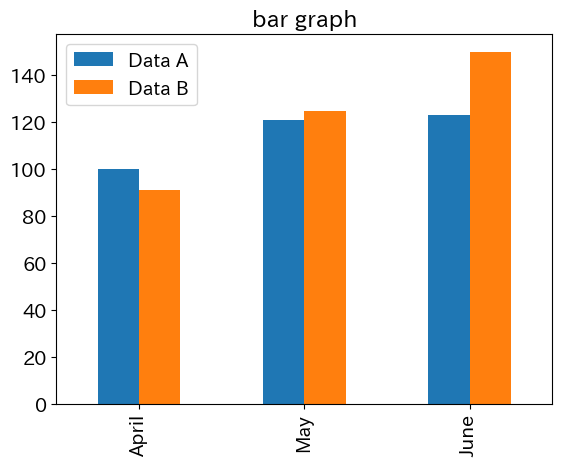

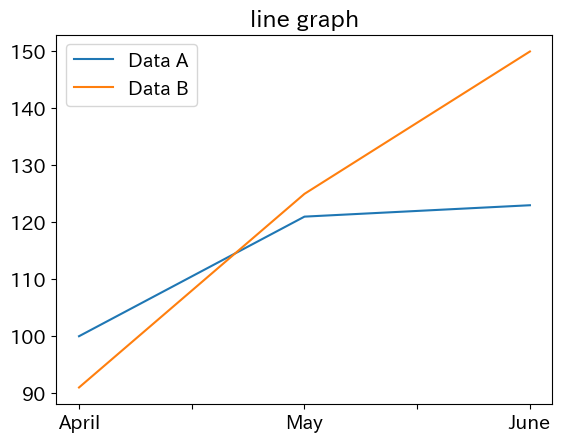

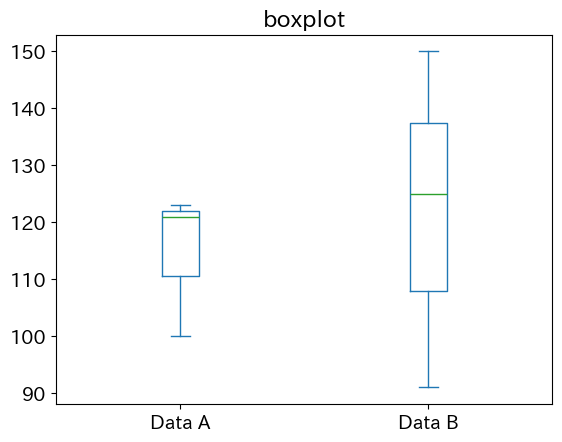

In [34]:
data_df = pd.DataFrame([[100, 91], [121, 125], [123, 150]],
                       index = ['April', 'May', 'June'],
                       columns = ['Data A', 'Data B'])
# 棒グラフ
data_df.plot(kind = 'bar', title = 'bar graph')
# 折れ線グラフ
data_df.plot(kind = 'line', title = 'line graph')
# 箱ひげ図
data_df.plot(kind = 'box', title = 'boxplot')
plt.show()